In [1]:
#Cargar la librería de comando de sistemas
import os
#Cargar la librería de manejo de datos
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Cargar los datos en csv
data = pd.read_csv('Ordenes_productos_C1_M2.csv',sep =';',encoding='latin-1')

In [3]:
data.head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18


In [4]:
data.dtypes

orden_id                          object
order_item_id                     object
producto_id                       object
vendedor_id                       object
fecha_envio_limite                object
precio                           float64
valor_flete                      float64
codigo_postal_vendedor             int64
ciudad_vendedor                   object
departamento_vendedor             object
nombre_categoria_producto         object
longitud_nombre_producto           int64
longitud_descripcion_producto      int64
cantidad_fotos_producto            int64
peso_g_producto                    int64
longitud_cm_producto               int64
altura_cm_producto                 int64
ancho_cm_producto                  int64
dtype: object

# Correlación de Pearson

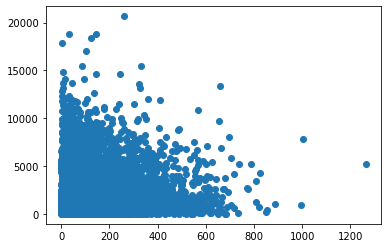

In [5]:
plt.scatter(data['precio'],data['peso_g_producto'])

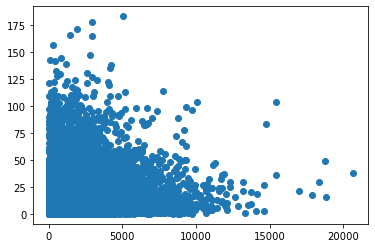

In [6]:
plt.scatter(data['peso_g_producto'],data['valor_flete'])

In [7]:
data[['precio','valor_flete','peso_g_producto']].corr(method = 'pearson')

,precio,valor_flete,peso_g_producto
precio,1.000000,0.004075,0.000687
valor_flete,0.004075,1.000000,-0.007394
peso_g_producto,0.000687,-0.007394,1.000000


# Correlación de Spearmen

In [8]:
#Crear medidas de volumen y área
data['area_cm2_producto'] = data['longitud_cm_producto']*data['altura_cm_producto']
data['volumen_cm3_producto'] = data['longitud_cm_producto']*data['altura_cm_producto']*data['ancho_cm_producto']
data.head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,area_cm2_producto,volumen_cm3_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14,187,2618
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21,86,1806
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29,243,7047
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22,2208,48576
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18,1170,21060


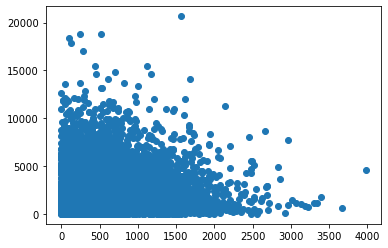

In [9]:
plt.scatter(data['area_cm2_producto'],data['peso_g_producto'])

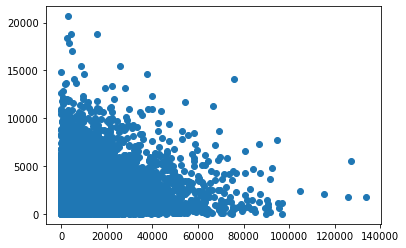

In [10]:
plt.scatter(data['volumen_cm3_producto'],data['peso_g_producto'])

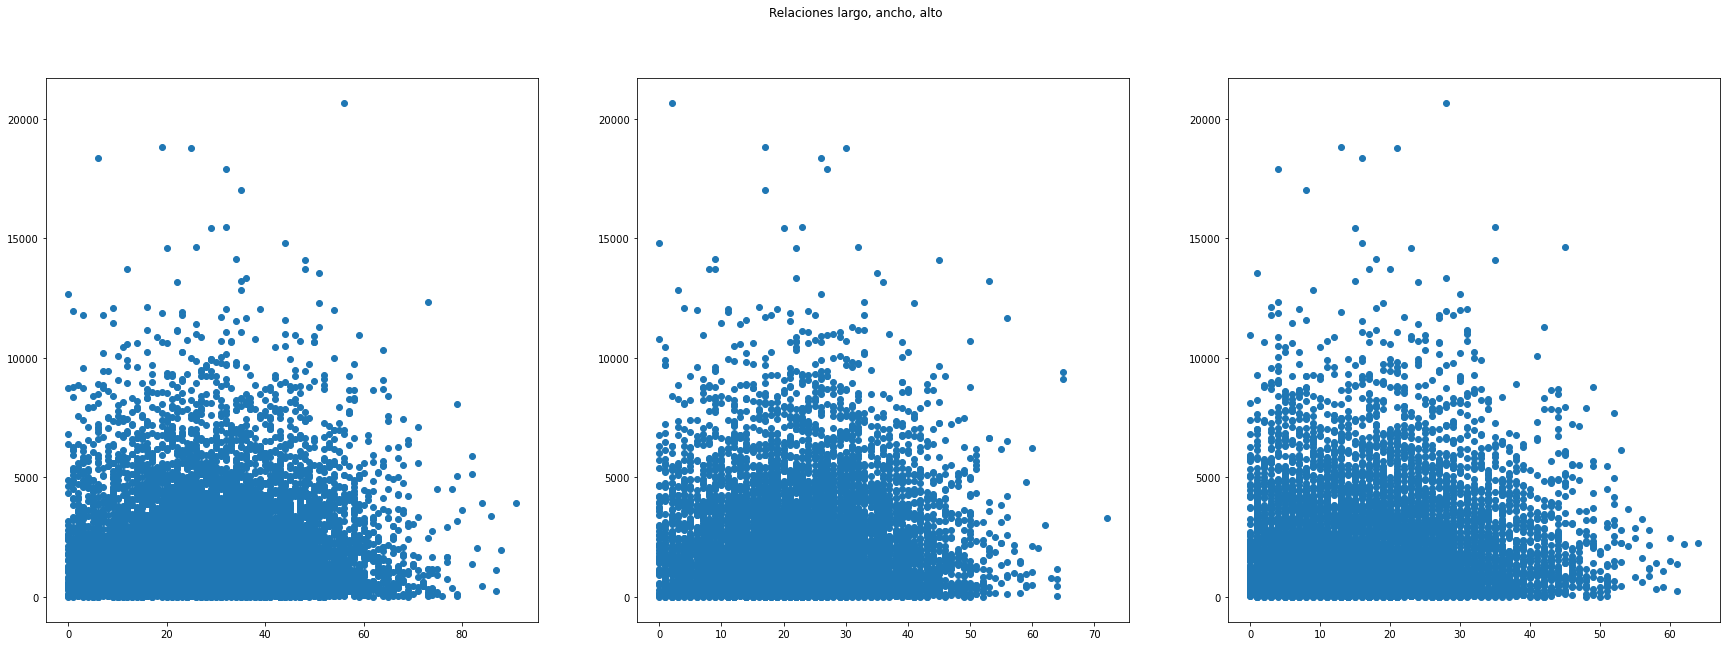

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(30,10))
fig.suptitle('Relaciones largo, ancho, alto')
ax1.scatter(data['longitud_cm_producto'],data['peso_g_producto'])
ax2.scatter(data['ancho_cm_producto'],data['peso_g_producto'])
ax3.scatter(data['altura_cm_producto'],data['peso_g_producto'])

In [12]:
corr = data[['longitud_cm_producto','altura_cm_producto',
             'ancho_cm_producto','peso_g_producto',
            'area_cm2_producto','volumen_cm3_producto']].corr(method = 'spearman')
corr

,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,peso_g_producto,area_cm2_producto,volumen_cm3_producto
longitud_cm_producto,1.000000,0.002816,-0.004389,0.013190,0.584639,0.484020
altura_cm_producto,0.002816,1.000000,0.011629,0.015161,0.753285,0.631474
ancho_cm_producto,-0.004389,0.011629,1.000000,0.014688,0.007347,0.471033
peso_g_producto,0.013190,0.015161,0.014688,1.000000,0.022410,0.022648
area_cm2_producto,0.584639,0.753285,0.007347,0.022410,1.000000,0.838702
volumen_cm3_producto,0.484020,0.631474,0.471033,0.022648,0.838702,1.000000


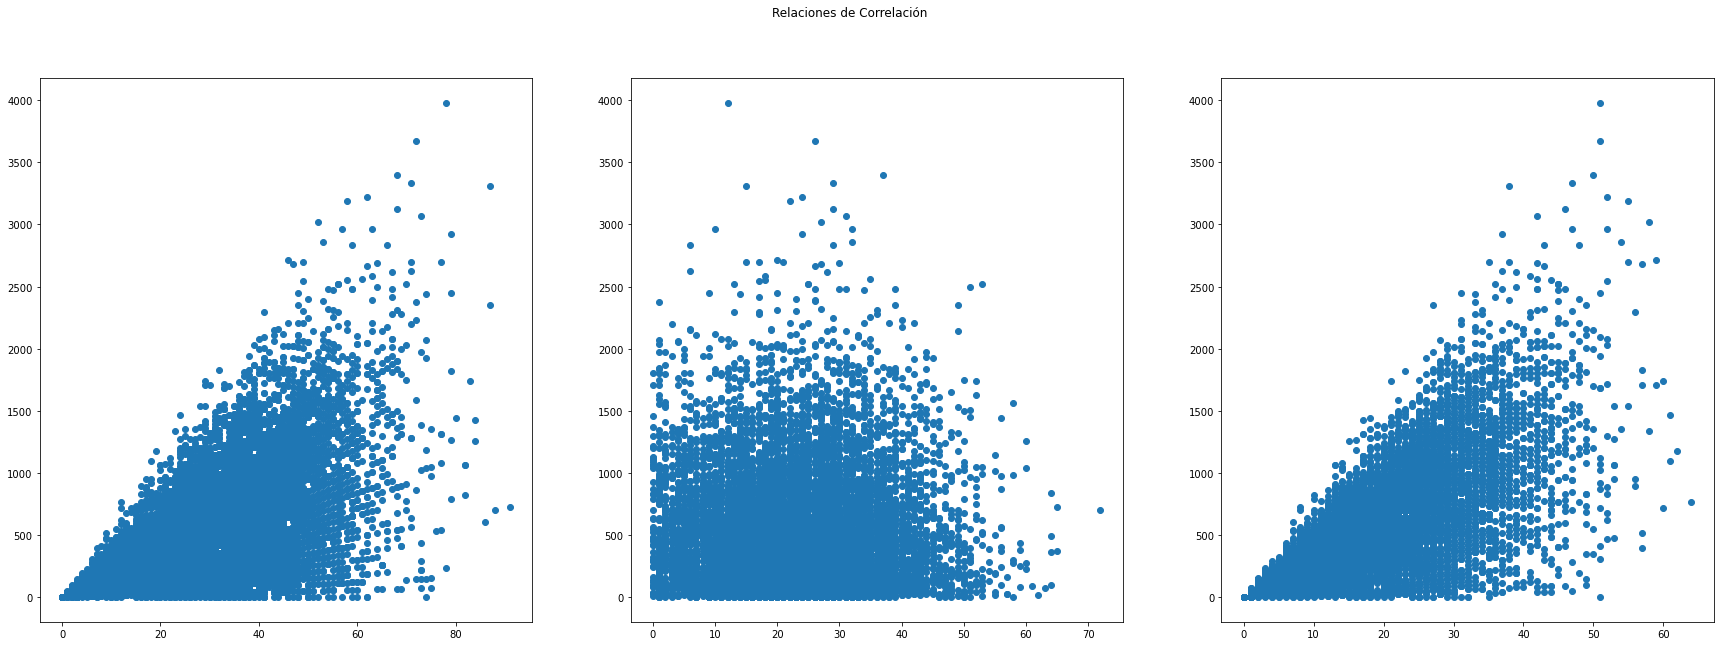

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(30,10))
fig.suptitle('Relaciones de Correlación')
ax1.scatter(data['longitud_cm_producto'],data['area_cm2_producto'])
ax2.scatter(data['ancho_cm_producto'],data['area_cm2_producto'])
ax3.scatter(data['altura_cm_producto'],data['area_cm2_producto'])

In [14]:
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

/var/folders/yr/887km_sj5j32s5mn4m8b_r8h0000gn/T/ipykernel_43393/708844545.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,peso_g_producto,area_cm2_producto,volumen_cm3_producto
longitud_cm_producto,1.00,0.00,-0.00,0.01,0.58,0.48
altura_cm_producto,0.00,1.00,0.01,0.02,0.75,0.63
ancho_cm_producto,-0.00,0.01,1.00,0.01,0.01,0.47
peso_g_producto,0.01,0.02,0.01,1.00,0.02,0.02
area_cm2_producto,0.58,0.75,0.01,0.02,1.00,0.84
volumen_cm3_producto,0.48,0.63,0.47,0.02,0.84,1.00
